In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer


import warnings
warnings.filterwarnings('ignore')

In [2]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

# EDA

In [3]:
df = pd.read_csv("lab01.csv").drop("Unnamed: 0", axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   object 
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   target  1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [5]:
df

,x1,x2,x3,x4,x5,target
0,осень,6.0,10.0,684.853714,489.727534,127000.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0
...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0


In [6]:
df.describe()

,x2,x3,x4,x5,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.475000,7.499000,520.742275,498.766465,108796.100000
std,1.499875,1.497412,287.152724,291.638738,34354.071039
min,5.000000,5.000000,1.626397,0.635090,30500.000000
25%,6.000000,6.000000,279.196095,244.377915,84600.000000
50%,7.000000,7.000000,536.006114,510.048008,106300.000000
75%,9.000000,9.000000,774.811907,749.538778,129450.000000
max,10.000000,10.000000,999.952338,999.316251,224800.000000


In [7]:
df.describe(include=["object"])

,x1
count,1000
unique,4
top,лето
freq,254


In [8]:
df["x1"].unique()

array(['осень', 'лето', 'зима', 'весна'], dtype=object)

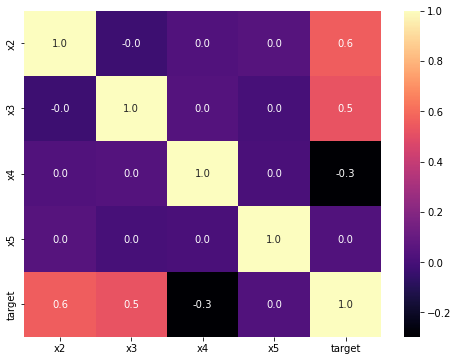

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".1f", cmap="magma");

In [10]:
df[["x1", "x2", "x3", "x4", "target"]].groupby(by=["x1"]).mean().reset_index()

,x1,x2,x3,x4,target
0,весна,7.553360,7.474308,523.738583,109937.154150
1,зима,7.448413,7.515873,526.159448,92966.269841
2,лето,7.464567,7.460630,527.331238,127424.015748
3,осень,7.431535,7.547718,504.987957,104517.842324


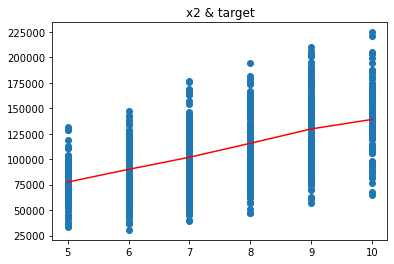

In [11]:
plt.plot(df.x2, df.target, "o")
dfgr = df[["x2", "target"]].groupby(by="x2").mean().reset_index()
plt.plot(dfgr.x2, dfgr.target, "r-")
plt.title("x2 & target");

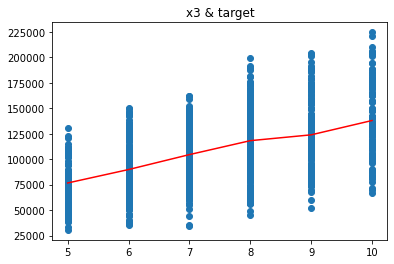

In [12]:
plt.plot(df.x3, df.target, "o")
dfgr = df[["x3", "target"]].groupby(by="x3").mean().reset_index()
plt.plot(dfgr.x3, dfgr.target, "r-")
plt.title("x3 & target");

In [13]:
kb = KBinsDiscretizer(n_bins=20, encode="ordinal")
df["dx4"] = kb.fit_transform(df[["x4"]])
del kb

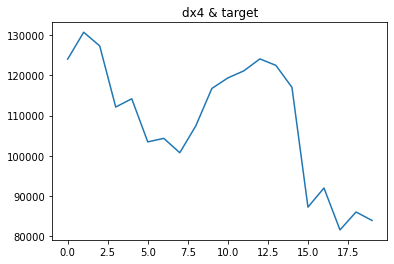

In [14]:
dfgr = df[["dx4", "target"]].groupby(by="dx4").mean().reset_index()
plt.plot(dfgr.dx4, dfgr.target)
plt.title("dx4 & target")
df.drop("dx4", axis=1, inplace=True)

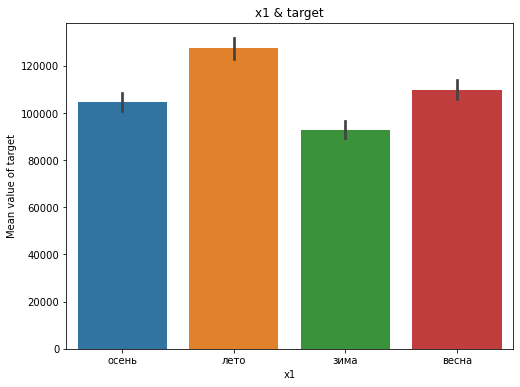

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="x1", y="target")
plt.ylabel("Mean value of target")
plt.title("x1 & target")
plt.show()

# Modelling

## Linear regression

In [16]:
df = pd.concat([df, pd.get_dummies(df["x1"])], axis=1).drop(["x1"], axis=1)

In [17]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
r2_lr = r2_score(y_test, y_pred)

In [21]:
print(f"R2 score: {round(r2_lr, 2)}")

R2 score: 0.88


## Polynomial regression

In [22]:
X.drop("x5",axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
kf = KFold(n_splits=17)
poly = PolynomialFeatures(degree=3)
pr = LinearRegression()

r2_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_poly = poly.fit_transform(X_train_kf)
    X_val_poly = poly.transform(X_val_kf)

    pr.fit(X_train_poly, y_train_kf)

    y_pred_kf = pr.predict(X_val_poly)
    r2_scores.append(r2_score(y_val_kf, y_pred_kf))

X_test_poly = poly.transform(X_test)
y_pred_test = pr.predict(X_test_poly)
r2_test = r2_score(y_test, y_pred_test)

print("Mean R2 score on cross-validation: ", round(np.mean(r2_scores), 2))
print("R2 score on test data: ", round(r2_test, 2))

Mean R2 score on cross-validation:  0.85
R2 score on test data:  0.89


## Linear regression (Discretized)

In [23]:
kb = KBinsDiscretizer(n_bins=25, encode="onehot-dense")
x4 = kb.fit_transform(df[["x4"]])
df1 = pd.concat([df, pd.DataFrame(x4)], axis=1)

X = df1.drop(["x4", "x5", "target"], axis=1)
y = df1["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

dlr = LinearRegression()
dlr.fit(X_train, y_train)
y_pred1 = dlr.predict(X_test)
r2_dlr = r2_score(y_test, y_pred1)
print(f"R2 score: {r2_dlr}")

R2 score: 0.9308196031398513
